In [1]:
pip install pydub


In [2]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
from google.colab import files
import IPython.display as ipd

In [3]:
# Upload the audio file
uploaded = files.upload()

Saving noisy_audio.mp3 to noisy_audio.mp3


In [7]:
for fn in uploaded.keys():
    audio = AudioSegment.from_file(fn)
    audio = audio.set_channels(1)
    samples = np.array(audio.get_array_of_samples())
    rate = audio.frame_rate

    # Listen to the original audio signal
    print("Original Audio Signal:")
    ipd.display(ipd.Audio(fn))

Original Audio Signal:


In [8]:
# Function to plot time domain signal
def plot_time_domain(signal, rate):
    times = np.arange(len(signal)) / float(rate)
    plt.figure(figsize=(12, 4))
    plt.plot(times, signal)
    plt.title('Time Domain Signal')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.show()

# Function to plot frequency domain signal
def plot_frequency_domain(signal, rate, lim,Title = 'Frequency Domain Signal'):
    n = len(signal)
    T = 1.0 / rate
    yf = fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    plt.figure(figsize=(12, 4))
    plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.title(Title)
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency (Hz)')
    plt.xlim(0, lim)  # Limit x-axis to 0-5000 Hz
    plt.show()

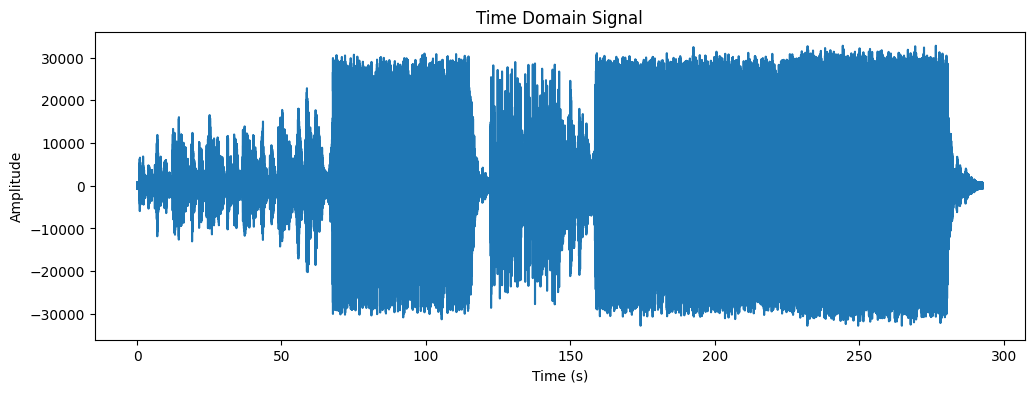

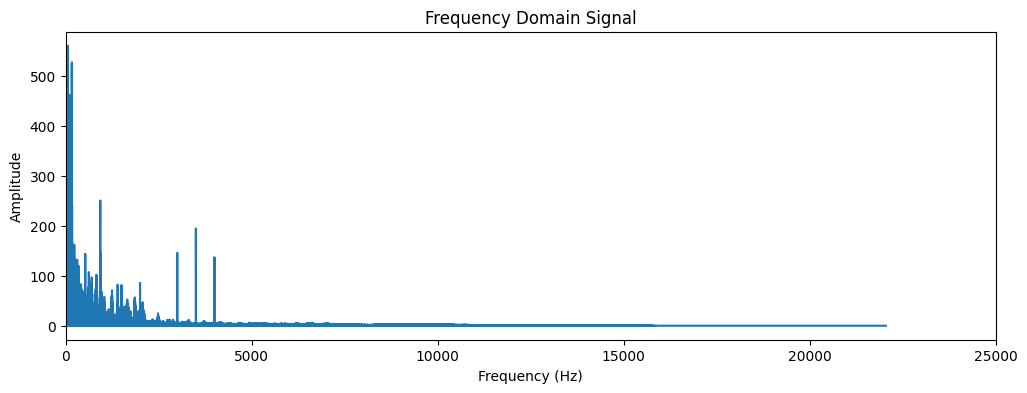

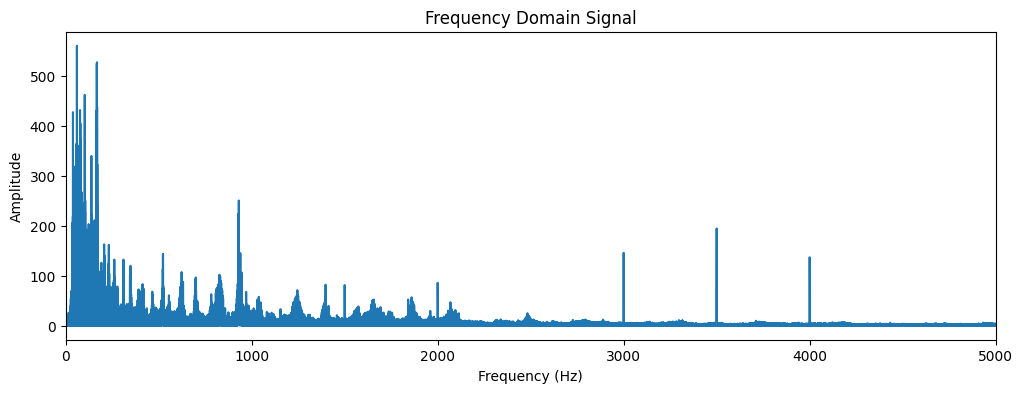

In [9]:
# Plot the time domain signal
plot_time_domain(samples, rate)

# Plot the frequency domain signal
plot_frequency_domain(samples, rate,25000)

# Plot the frequency domain signal
plot_frequency_domain(samples, rate,5000)

In [37]:
from scipy.signal import butter, filtfilt
# Function to filter out noise from the signal
def butter_lowpass_filter(data, cutoff, fs, order=2):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    removed_signal = data - y
    return y

# Filter out the noise from the signal
filtered_samples= butter_lowpass_filter(samples, cutoff=6500, fs=rate)
print(filtered_samples)

[ 94.93584833 379.47480237 598.71052622 ...  84.27997361  57.93436337
  22.0775351 ]


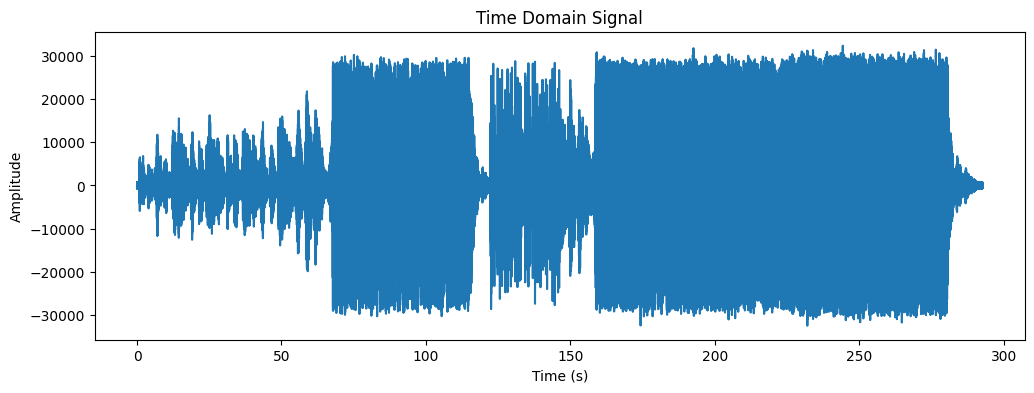

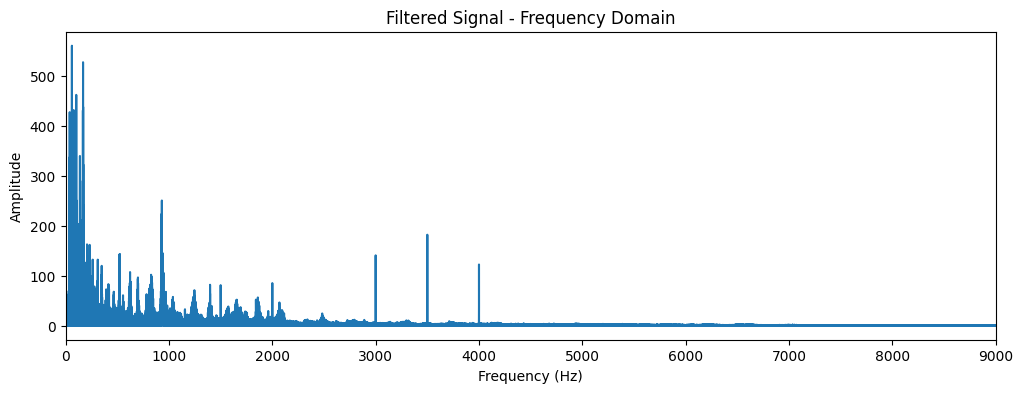

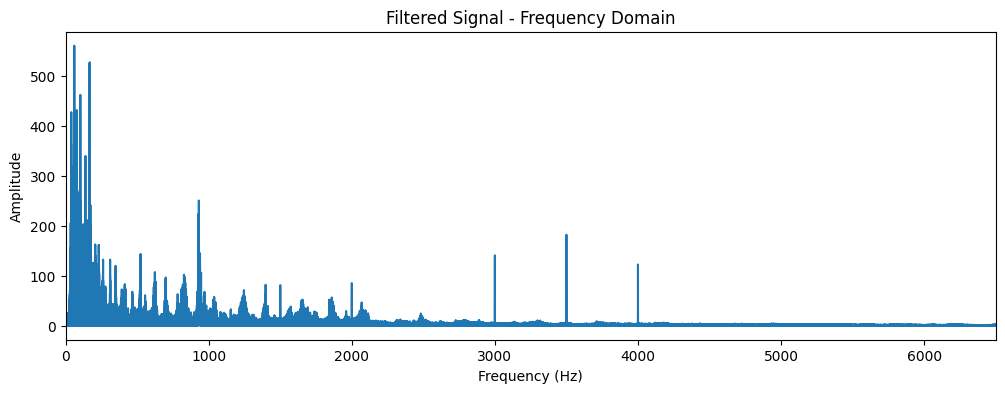

In [38]:
# Plot the filtered time domain signal
plot_time_domain(filtered_samples, rate)

# Plot the filtered frequency domain signal
plot_frequency_domain(filtered_samples, rate,9000,"Filtered Signal - Frequency Domain")

# Plot the filtered frequency domain signal
plot_frequency_domain(filtered_samples, rate,6500,"Filtered Signal - Frequency Domain")

In [42]:
print(filtered_samples)

[ 94.93584833 379.47480237 598.71052622 ...  84.27997361  57.93436337
  22.0775351 ]


In [43]:
from scipy.signal import butter, sosfilt

def butter_bandstop_filter(data, lowcut, highcut, fs, order=10):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = butter(order, [low, high], btype='bandstop', output='sos')
    y = sosfilt(sos, data)
    return y

In [51]:
lowcut = 3995  # Example low cutoff frequency
highcut = 4005  # Example high cutoff frequency
filtered_samples= butter_bandstop_filter(filtered_samples, lowcut, highcut, fs=rate)

lowcut = 3495  # Example low cutoff frequency
highcut = 3505  # Example high cutoff frequency
filtered_samples= butter_bandstop_filter(filtered_samples, lowcut, highcut, fs=rate)

lowcut = 2995  # Example low cutoff frequency
highcut = 3005  # Example high cutoff frequency
filtered_samples= butter_bandstop_filter(filtered_samples, lowcut, highcut, fs=rate)

lowcut = 3995  # Example low cutoff frequency
highcut = 4005  # Example high cutoff frequency
filtered_samples= butter_bandstop_filter(filtered_samples, lowcut, highcut, fs=rate)

lowcut = 1995  # Example low cutoff frequency
highcut = 2005  # Example high cutoff frequency
filtered_samples= butter_bandstop_filter(filtered_samples, lowcut, highcut, fs=rate)

In [52]:
print(filtered_samples)

[ 90.70957007 355.35612401 539.06152158 ...  53.20750798  70.45047265
  95.87264734]


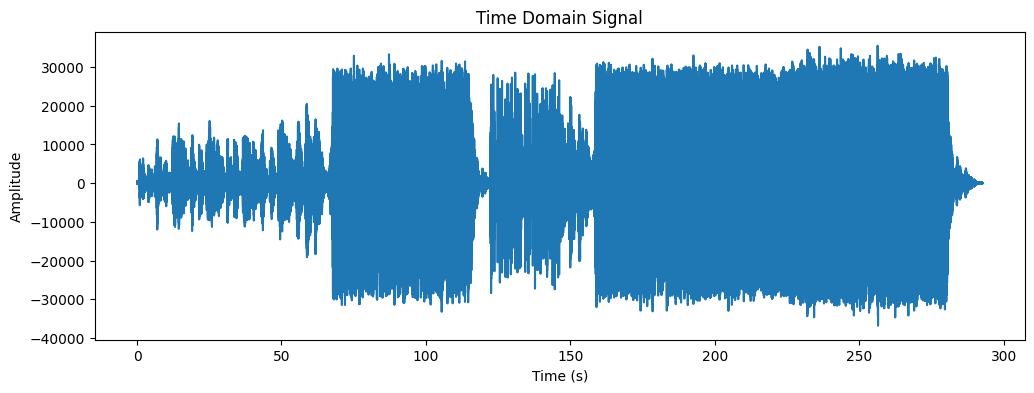

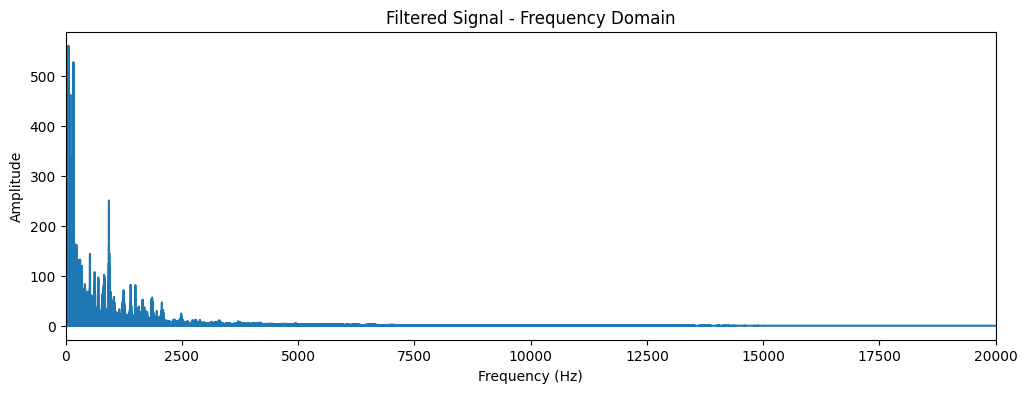

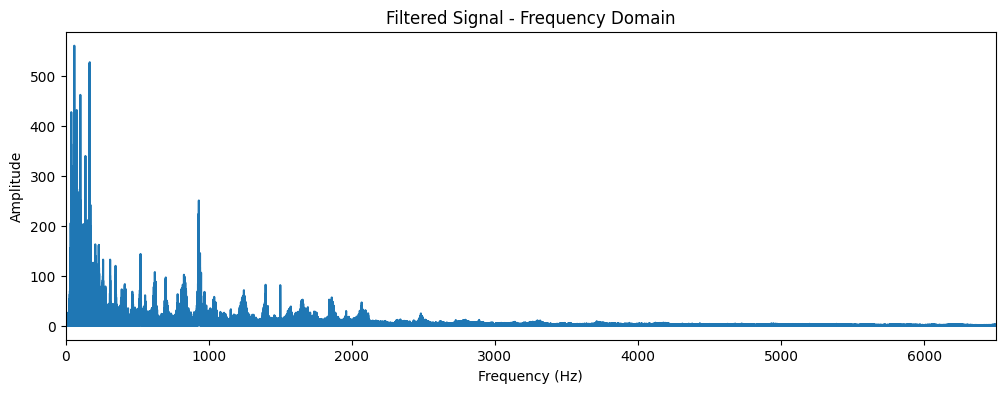

In [55]:
# Plot the filtered time domain signal
plot_time_domain(filtered_samples, rate)

# Plot the filtered frequency domain signal
plot_frequency_domain(filtered_samples, rate, 20000, "Filtered Signal - Frequency Domain")

# Plot the filtered frequency domain signal
plot_frequency_domain(filtered_samples, rate, 6500, "Filtered Signal - Frequency Domain")